In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import tcn

sns.set_style("whitegrid")

In [2]:
runs = pd.read_csv("runs.csv")

In [3]:
runs = runs[runs.Status=="FINISHED"]

In [4]:
runs["receptive_field"] = tcn.receptive_field_size(runs.kernel_size, runs.depth)

In [5]:
runs = runs.drop(['Name', 'Source Type', 'Source Name', 'User', 'Status'], axis=1)

In [8]:
def plot_performance(y, data, file_name=None):
    fig, ax = plt.subplots(1,1, figsize=(12,8))
    sns.scatterplot(x="receptive_field", 
                    y=y,
                    hue="kernel_size",
                    size="filters",
                    style="normalize_inputs",
                    sizes={v: 2*v for v in runs.filters.unique()},
                    markers={True: "o", False: "X"},
                    palette="Set2",
                    data=data, ax=ax)
    ax.axvline(150, linestyle="--", color="gray")
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    
    if file_name:
        fig.savefig(file_name)

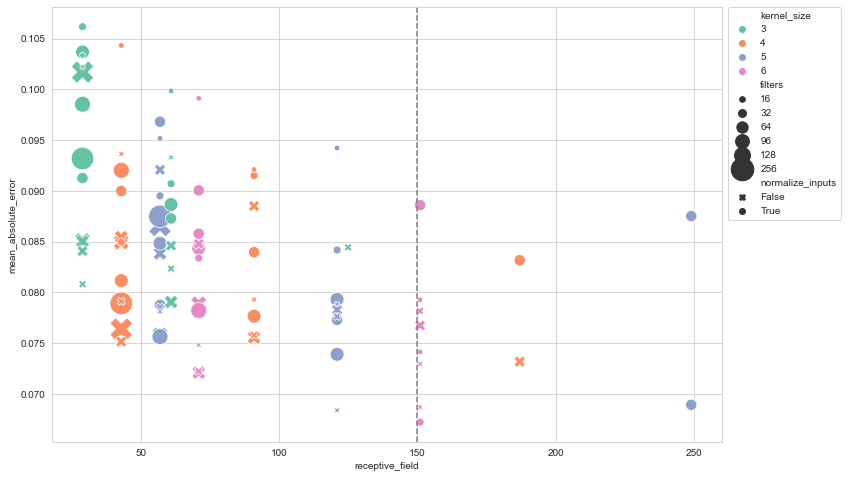

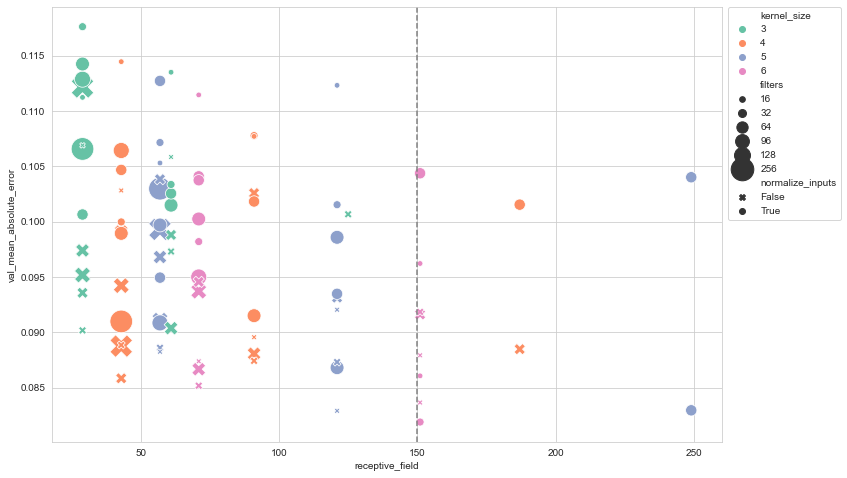

In [9]:
plot_performance("mean_absolute_error", data=runs, file_name="performance_train.png")
plot_performance("val_mean_absolute_error", data=runs, file_name="performance_validation.png")

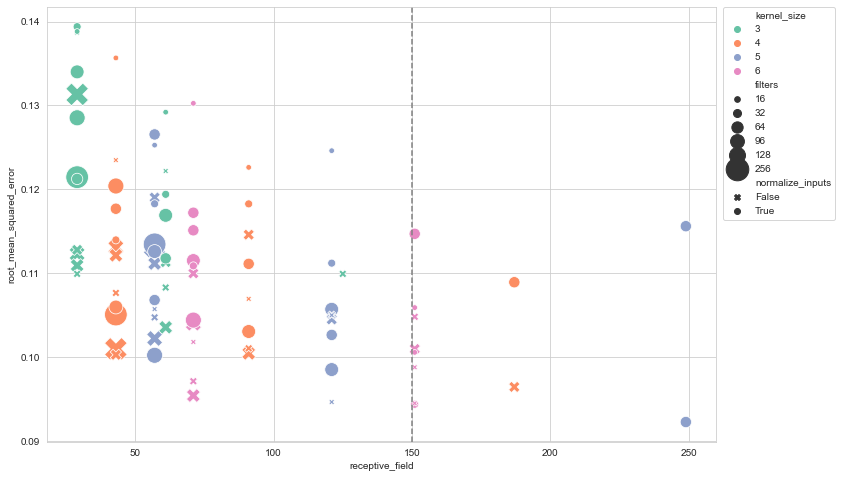

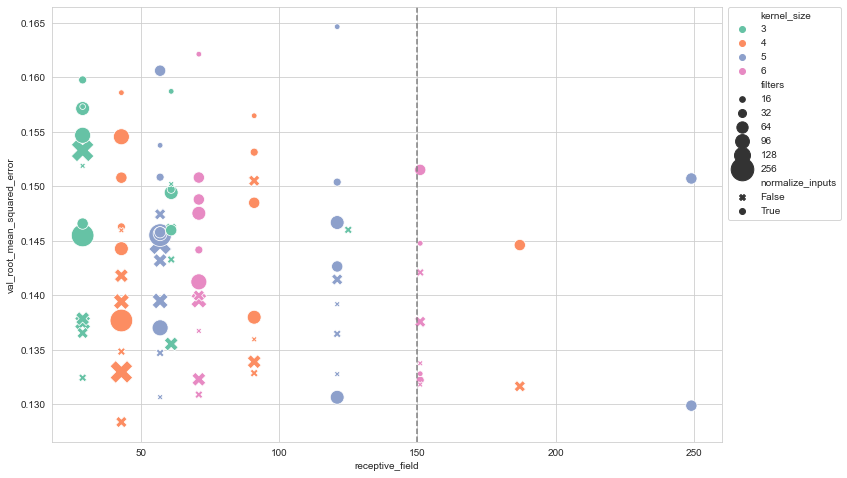

In [10]:
plot_performance("root_mean_squared_error", data=runs)
plot_performance("val_root_mean_squared_error", data=runs)

In [11]:
tcn.receptive_field_size(8, 5)

435